In [1]:
NAME = "Robina Shaheen"
DATE = "06242020"
COLLABORATORS = ""

# Wildfires in California: Causes and Consequences

The rising carbon dioxide in the atmosphere is contributing to constant increase in global temperatures. Over the last two decades, humanity has observed record-breaking extreme weather events. A comparison with the historical data indicates higher frequency,  larger magnitude, longer duration, and timing of many of these events around the world has also changed singniciantly (Seneviratne et al., 2018). Wildfires are no exception, as seen in the recent years, devastating blazes across the globe (Amazon forest in 2019, California 2017-18 and Australia in 2019-2020. In the western U.S., wildfires are projected to increase in both frequency and intensity as the planet warms (Abatzoglou and Williams, 2016). The state of California with ~ 40 million residents and ~ 4.5 million housings and properties has experienced the most devastating economic, ecological and health consequences during and after wildfires (Baylis and Boomhower, 2019; Liao Y and Kousky C, 2020,).

During 2014 wildfires in San Diego, I volunteered to help people in the emergency shelters and watching the devastating effects of wildfires on children and adults emotional and physical health had a profound impact on me and moved me at a deeper level to search for potential markers/predictors of these events in the nature. This analysis is not only an academic endeavor but also a humble beginning to understand the complex interactions between atmosphere and biosphere in the nature and how we can plan for a better future for those who suffered the most during these catastrophic wildfires. 

This goal of this study is to understand the weather data that can trigger wildfires and consequences of wildfires on the atmospheric chemistry and how we can predict and plan for a better future to mitigate disastrous consequences. 
I have laid out this study in multiple sections:
1. Understanding weather pattern using advanced machine learning tools to identify certain markers that can be used to forecast future events.
2. Understanding changes in the chemical composition of the atmosphere and identify markers that can trigger respiratory stress and cardio-vascular diseases. 

## Pictrue of an unprecdent wildfire near Camp Pendelton.
**Pulgas Fire 2014, San Diego, CA (source= wikimedia)**
<a href="https://en.wikipedia.org/wiki/May_2014_San_Diego_County_wildfires" target="_blank">May 2014 Wildfires</a>.
![pulgasfire](https://cdn.dvidshub.net/media/thumbs/photos/1405/1349861/1000w_q95.jpg)

## Workflow
1. Import packages and modules 
2. Import datetime conversion tools beteween panda and matplotlib for time series analysis
3. Download air quality data from the EPA website
4. Set working directory to "earth-analytics" 
5. Define paths to download data files from data folder 'sd_fires_2014'
6. Import data into dataframes using appropriate functions(date-parser, indexing, remove missing values)
    * weather data  Jan-Dec. 2014
    * Atmospheric gases and particulate matter data Jan - Dec. 2014
    * Annual precipitation (2007-2020) San Diego, CA. 
7. view nature and type of data 
8. Use Scikit learn multivariate analysis to predict ozone levels.
9. Plot data to view any anomalies in data and identify source of the anomaly .
10. discuss plots and conclusions.

## Resources

* Environmental Protection Agency, USA. <a href="https://https://www.epa.gov/outdoor-air-quality-data//" target="_blank">EPA website/ User Guide to download data</a>.

* Precipitation Record (2007-2020), San Diego, CA. <a href="http://www.wx4mt.com/wxraindetail.php?year=2020//" target="_blank"> San Diego Weather, CA</a>.


## Import packages/ modules and Set Working Directory

In [2]:
# Import packages/ modules
import os
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
import earthpy as et
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime
from textwrap import wrap
from statsmodels.formula.api import ols

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Scikit learn to train model and make predictions.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Set Working Directory
ea_path = os.path.join(et.io.HOME, 'earth-analytics')

# Set base path to download data
base_path = os.path.join(ea_path, "data")
base_path

'C:\\Users\\bina_\\earth-analytics\\data'

# Data exploration and analysis
The EPA provides data for the entire state and it is a large data set, often slowing the processing time. 
Therefore, it is important to select data required to check air quality and weather conditions. 
I have selected ozone, oxides of nitrogen and carbon monoxide that are produced during wildfires. 
Additionally, black carbon and particulate matter is emitted during wildfires which is dangerous to inhale. 
These dataset will allow me to conduct my preliminary analysis of the effects of wildfires on the air quality in San Diego County.  

In [3]:
file_path21 = os.path.join(base_path, "output_figures", 
                           "sandiego_2014_fires", "air_quality_csv",
                           "sd_chemical_composition_2014_mean_v02.csv")

# To check if path is created
os.path.exists(file_path21)

# Define relative path to files
file_path1 = os.path.join(base_path, "output_figures", 
                          "sandiego_2014_fires", "air_quality_csv",
                          "sd_weather_2014_mean_values_only.csv")
# To check if path is created
os.path.exists(file_path1)

True

In [4]:
# Import csv files into dataframe and ensure date time is imported properly.
sd_weather_2014_df = pd.read_csv(file_path1, parse_dates=['Date Local'],
                                 index_col=['Date Local'])
sd_weather_2014_df.head(3)

,T (oF),RH (%),P (mb),wind (mph)
Date Local,,,,
2014-01-01,55.489583,42.916666,999.845833,90.233565
2014-01-02,58.156250,40.027778,998.504167,84.944213
2014-01-03,57.661458,44.597222,996.229167,81.395833


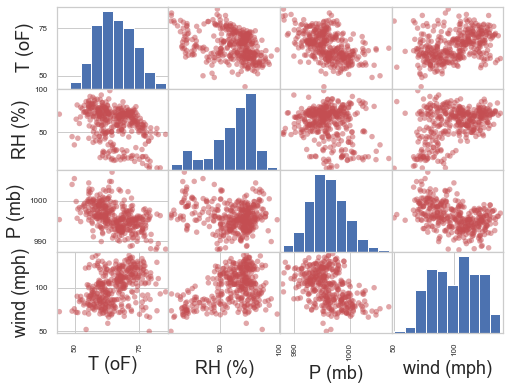

In [5]:
# Use pandas scatter matrix function to view relationships between various components of weather system.
pd.plotting.scatter_matrix(sd_weather_2014_df, s=30, figsize=[
                           8, 6], marker='o', color='r')
plt.show()

The figure above shows a Gaussian distribution of temperature and pressure, whereas relative humidity data is skewed towards lower humidity levels.The wind pattern shows two distinct populations. Both relative humidity and wind pattern indicates extreme weather changes during Santa Ana events. 
The correlation matrix graph shows inverse correlation between temperature and relative humidity. One can easily identify how extremely low relative humidity (<30%) can easily damage shrubs and other vegetations. The inverse relationship between pressure, temperature and winds is obvious from these graphs. A time series data has already shown that a high resolution record of temperature, relative humidity and wind can be used as a useful indicator of wildfire season.   

# Autocorrelation plot and lag plot
Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band. 

1. The auto correlation plot shows the weather parameters are strongly related to each other.
2. A lag plot is a special type of scatter plot with the two variables (X,Y) and their frequency of occurrence. A lag plot is used to checks 
a. Outliers (data points with extremely high or low values).
b. Randomness (data without a pattern).
c. Serial correlation (where error terms in a time series transfer from one period to another).
d. Seasonality (periodic fluctuations in time series data that happens at regular periods).

A lag plot of San Diego weather data shows two distinct populations, anomalous values during wildfires in the right upper corner and normal values are linearly correlated in the lag plot.
The lag plot help us to choose appropriate model for Machine learning.

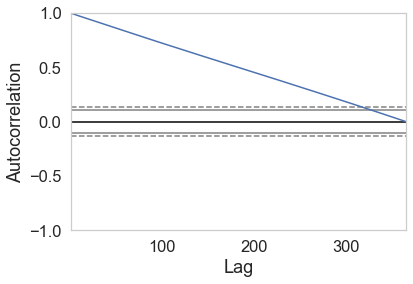

In [6]:
# For this plot we need pandas.plotting import autocorrelation_plot function.
autocorrelation_plot(sd_weather_2014_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


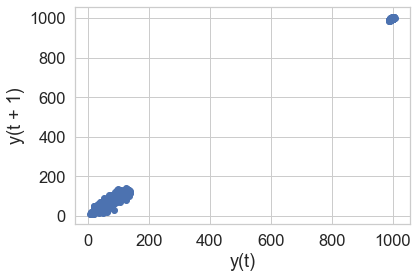

In [7]:
# For the lag plot we need to import pandas.plotting import lag_plot functions
plt.figure()
lag_plot(sd_weather_2014_df)

# The Chemical Composition of the Atmosphere
The atmosphere is composed of gases and aerosols (liquid and solid particles in the size range of few nanometer to micrometers).
In the cells below we are going to explore machine learning models and stats to understand the relations between various parameters. We will use Scikit learn multivariate analytical tools to predict the ozone concentrations. Ozone is a strong oxidant and very irritating gas. It can enter the respiratory system and damage thin linings of the respiratory system by producing free radicals.

# Scikit-learn

Scikit-learn is a simple and efficient tools for predictive data analysis.

It is designed for machine learning in python and built on NumPy, SciPy, and matplotlib.

In this notebook I have employed Scikkit-learn to understand relationship between ozone and its precursors.

Ozone formation depends on the presence of oxide of nitrogen, carbon monoxide and volatile organic compounds.

However, VOC's are not measured at all the stations and few stations have values measured for half of the year. 
These msissing values cannot be predicted or filled due to spatial variability of its sources. 


In [8]:
# Import dataframe and view columns
sd_atm_df = pd.read_csv(file_path21, parse_dates=['Date Local'],
                        index_col=['Date Local'])
sd_atm_df.head(2)
sd_atm_df.columns

Index(['O3_ppm_mean', 'O3 (ppb)', 'NO2 (ppb)', 'PM2.5 (ug/m3)', 'CO_ppm',
       'CO (ppb)'],
      dtype='object')

In [9]:
# Understanding nature of the data
sd_atm_df.describe()

,O3_ppm_mean,O3 (ppb),NO2 (ppb),PM2.5 (ug/m3),CO_ppm,CO (ppb)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.030693,30.693122,10.490526,10.493389,0.403001,403.001442
std,0.006991,6.990947,6.042576,4.754778,0.189696,189.696481
min,0.011977,11.977000,2.655821,2.066667,0.153409,153.409000
25%,0.025705,25.704818,5.732708,7.730729,0.260755,260.754833
50%,0.030571,30.571100,8.517046,10.026191,0.344201,344.200500
75%,0.035479,35.478700,13.773292,12.513799,0.512228,512.228500
max,0.052010,52.010000,32.668723,60.135417,1.017736,1017.736333


In [11]:
# To check empty columns, False means no empty colums
sd_atm_df.isnull().any()

O3_ppm_mean      False
O3 (ppb)         False
NO2 (ppb)        False
PM2.5 (ug/m3)    False
CO_ppm           False
CO (ppb)         False
dtype: bool

In [12]:
# To fill empty cells with the nearest neighbour.
sd_atm_df = sd_atm_df.fillna(method='ffill')

In [13]:
# selected data frame for training
X = sd_atm_df[['NO2 (ppb)', 'CO_ppm', 'PM2.5 (ug/m3)']].values
y = sd_atm_df['O3 (ppb)'].values
X

array([[18.37351771,  0.90218338, 60.13541675],
       [22.43892814,  0.94763283, 20.37047343],
       [24.411817  ,  0.97001683, 19.8135965 ],
       ...,
       [15.17263887,  0.6464295 , 13.94159086],
       [10.64458162,  0.4243655 ,  6.63047025],
       [ 9.93215   ,  0.428748  , 16.916244  ]])

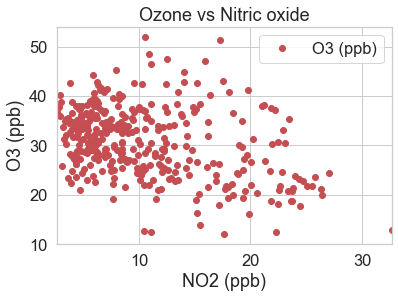

In [14]:
# To view relaion between ozone and its precursor NOX.
sd_atm_df.plot(x='NO2 (ppb)', y='O3 (ppb)', style='o', c='r')
# sd_atm_df.plot(x2='NO2 (ppb)', y2='CO_ppm', style='o', c='b')
plt.title('Ozone vs Nitric oxide')
plt.xlabel('NO2 (ppb)')
plt.ylabel('O3 (ppb)')
plt.show()
# plt.savefig('data/output_figures/sandiego_2014_fires/air_quality_csv/O3_NOx_relation.png')

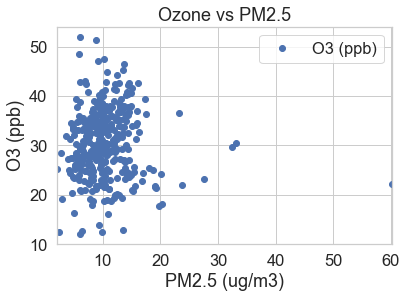

In [15]:
# To view relaion between ozone and its precursor NOX.
sd_atm_df.plot(x='PM2.5 (ug/m3)', y='O3 (ppb)', style='o', c='b')
plt.title('Ozone vs PM2.5')
plt.xlabel('PM2.5 (ug/m3)')
plt.ylabel('O3 (ppb)')
# plt.savefig('data/output_figures/sandiego_2014_fires/air_quality_csv/O3_PM2.5_relation.png')
plt.show()

In [16]:
# random state is a seed for data training
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Our next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. We want to predict the oxide of nitrogen depending upon the carbon monoxide (CO) recorded. 

Next, we will split 80% of the data to the training set while 20% of the data to test set using below code. The test_size variable is where we actually specify the proportion of the test set.

In [25]:
# random state is a seed for data training
indices = sd_atm_df.index.values
X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split(
    X, y, indices, test_size=0.2, random_state=0)
X

array([[18.37351771,  0.90218338, 60.13541675],
       [22.43892814,  0.94763283, 20.37047343],
       [24.411817  ,  0.97001683, 19.8135965 ],
       ...,
       [15.17263887,  0.6464295 , 13.94159086],
       [10.64458162,  0.4243655 ,  6.63047025],
       [ 9.93215   ,  0.428748  , 16.916244  ]])

In [18]:
# Training Algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

33.395895011457256
[-0.4457463  -0.79214025  0.20259138]


In [20]:
y_pred = regressor.predict(X_test)
X_test
# print(y_pred)
type(y_pred)

numpy.ndarray

In [21]:
# converted to DF
df2 = pd.DataFrame({'Date': idx2, 'Actual': y_test, 'Predicted': y_pred})
df2.head(2)
# Set index on date to identify anomalous events in the plot.
df3 = df2.set_index('Date')
df3.index = df3.index.date
# df3 = df2.set_index('Date')
df3.head(3)

,Actual,Predicted
2014-04-17,39.496778,33.963768
2014-09-17,29.229364,31.405086
2014-02-15,24.700636,25.743098


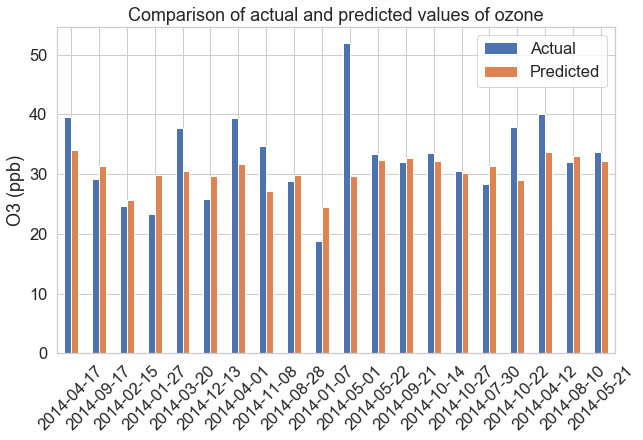

In [22]:
# # Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 6))

# printing only 20% values
df3 = df3.head(20)
df3.plot(ax=ax, kind='bar')

# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Comparison of actual and predicted values of ozone')
plt.ylabel('O3 (ppb)')
# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

# plt.savefig('data/output_figures/sandiego_2014_fires/air_quality_csv/O3_multivariate_analysis.png')
plt.show()

In [23]:
# Results:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.175979035211536
Mean Squared Error: 42.42135163302012
Root Mean Squared Error: 6.513167557572899


Mean O3 (ppb) = 30.693
RMSE = 6.51

# Conclusion
1. The ozone prediction from model = (6.51/30.69)*100 ~ 20% less than actual value. still reasonable model fit. 

2. Bar grpah with predicted values indicated huge deviation on May 01, 2014 which is the wildfire day at its peak.

3. Taking wildfire days out will improve the relationship between normal parameters and hence MLR coefficents.
 

4. The ozone fromation depends on temp, pressure and destruction with OH radical, photolysis and collisons with air moleucles.  The data for one of the important source of ozone formation VOC is incomplete and it can signficntly brings predicted values in alignment with the observed one.

5. A comparison with the rain in the previous years tells us an intersting story that good rainy season in 2011-12 resulted in huge biomass accumulation in San Diego. 

6. Intense drought in 2012-2013 caused the biomass to turn into dry fuel for fire ignition. 

7. In future studies, it would be valuable to compare rain patterns with wildfires in California.

# Future Outlook
There are many exciting avenues to expand this work to more wildfire events and comparison with weather and atmospheric conditions to test our model.


# Preliminary Analysis of Rain Patterns in San Diego.

**Figure . cumulative rain and number of rainy days in San Diego California, USA.**

<img src="http://drive.google.com/uc?export=view&id=12tON_T9EbfuwqyTGbNwcp60P65VEaHov" width="400" height="200">


The figure above shows that precipitation in 2010 was more than normal and resulted in rapid growth of shrubs, grasses and other vegetations which later served as tinder for fires in early 2014. The black line indicates exponential decrease in precipitation after heavy rains in 2010. 
Tinder is an easily combustible material (dried grass and shrubs) and is used to ignite fires.
The black line indicates exponential decrease in precipitation after heavy rains in 2010. A further analysis of rain pattern in 2020 indicated 110mm of rain in Dec. 2020 which is almost half of the annual rain in San Diego. There was no rain from July-Aug. 2020 after deadly wildfires and had even worse consequences for the health of locals.
As climate is changing the populations are suffering not only from the immediate impact of wildfires but lingering effects of fine particulate matter and toxic gases are even worst especially for children and individuals suffering from respiratory diseases (Amy Maxman 2019).

# References
Abatzoglou, T. J., and Williams P. A., Proceedings of the National Academy of Sciences Oct 2016, 113 (42) 11770-11775; DOI: 10.1073/pnas.1607171113

Seneviratne, S. et al., ,Philos Trans A Math Phys Eng Sci. 2018 May 13; 376(2119): 20160450, doi: 10.1098/rsta.2016.0450

Baylis, P., and  Boomhower, J., Moral hazard, wildfires, and the economic incidence of natural disasters, Posted: 2019, https://www.nber.org/papers/w26550.pdf

Liao, Yanjun and Kousky, Carolyn, The Fiscal Impacts of Wildfires on California Municipalities (May 27, 2020). https://ssrn.com/abstract=3612311 or http://dx.doi.org/10.2139/ssrn.3612311 

Amy Maxman, California biologists are using wildfires to assess health risks of smoke. Nature 575, 15-16 (2019),doi: 10.1038/d41586-019-03345-2
